## Paso 1: Cargar y preparar el conjunto de datos

In [100]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: C:\Users\tomas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1.1 Desplegar "heart.csv"

In [102]:
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [103]:
# Con el siguiente comando vamos a ver:
#- Ver tipos de datos
#- Confirmar que no hay nulos
#- Mostrar que el dataset está limpio
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

# 1.2 Binarizar 

In [104]:
df["Heart Disease"] = df["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})


In [105]:
#Verificar binarizacion 
df[["Heart Disease"]].head()


,Heart Disease
0,1
1,0
2,1
3,0
4,0


# 1.3

In [106]:
#Vemos estadisticas descriptivas
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [107]:
#Vemos si falta algun valor
#Si todo vemos que esta en 0, es poraue esta bien.
df.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

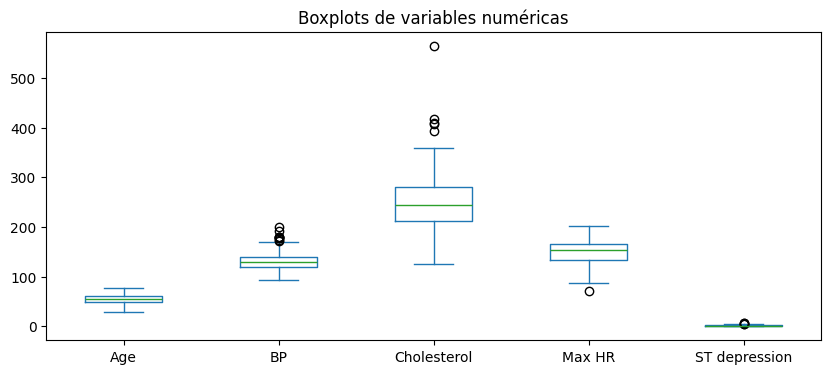

In [108]:
cols_box = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]

df[cols_box].plot(kind="box", figsize=(10,4))
plt.title("Boxplots de variables numéricas")
plt.show()


Los boxplots muestran la presencia de valores atípicos principalmente en las variables de
colesterol y depresión del segmento ST. En el caso del colesterol, se observan valores
considerablemente altos en comparación con la mediana, lo cual puede asociarse a
pacientes con hipercolesterolemia severa, un factor de riesgo reconocido para enfermedades
cardíacas. De manera similar, la variable de depresión del segmento ST presenta algunos
valores elevados que indican posibles alteraciones isquémicas más pronunciadas.

En contraste, variables como la edad, la presión arterial y la frecuencia cardíaca máxima
presentan distribuciones más concentradas y con menor cantidad de valores extremos, lo que
sugiere un comportamiento más homogéneo dentro de la población analizada. Los valores
atípicos identificados se consideran clínicamente plausibles y representativos de casos
reales, por lo que fueron mantenidos para el entrenamiento del modelo.


In [109]:
df["Heart Disease"].value_counts()


Heart Disease
0    150
1    120
Name: count, dtype: int64

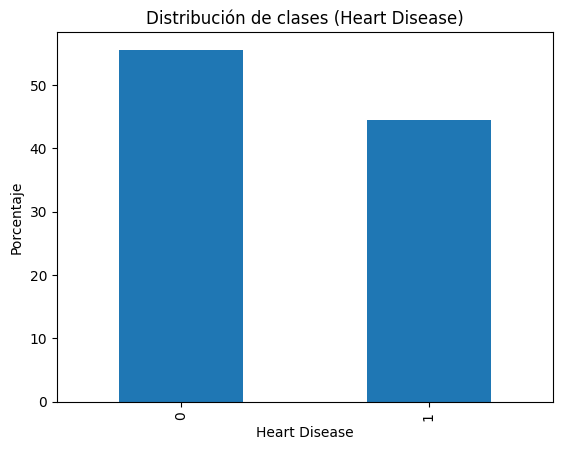

In [110]:
(df["Heart Disease"].value_counts(normalize=True) * 100).plot(kind="bar")
plt.ylabel("Porcentaje")
plt.title("Distribución de clases (Heart Disease)")
plt.show()


La distribución de clases muestra que aproximadamente el 55.6% de los pacientes no
presentan enfermedad cardíaca, mientras que el 44.4% sí la presentan. Aunque existe
una ligera diferencia entre ambas clases, el conjunto de datos se considera
relativamente balanceado, por lo que no se requiere aplicar técnicas adicionales
para el manejo de desbalance durante el entrenamiento del modelo.


## Exploratory Data Analysis (EDA) – Conclusion
Se realizó un análisis exploratorio del conjunto de datos de enfermedades cardíacas, el cual
contiene un total de 270 registros de pacientes con múltiples características clínicas.
Las estadísticas descriptivas muestran que las variables presentan rangos coherentes con
valores médicos reales, tales como edades comprendidas entre la adultez media y avanzada,
niveles variables de colesterol y presión arterial, y valores de frecuencia cardíaca máxima
acordes a evaluaciones clínicas.

No se identificaron valores faltantes en ninguna de las variables del conjunto de datos.
A través del uso de boxplots se detectaron valores atípicos principalmente en las variables
de colesterol y depresión del segmento ST. Estos valores extremos se consideran
clínicamente plausibles, ya que pueden representar pacientes con factores de riesgo
cardiovascular elevados, por lo que fueron conservados para el entrenamiento del modelo.

La distribución de la variable objetivo muestra que aproximadamente el 55.6% de los
pacientes no presentan enfermedad cardíaca, mientras que el 44.4% sí la presentan.
Esta proporción indica que el conjunto de datos se encuentra relativamente balanceado,
lo cual permite entrenar modelos de clasificación sin la necesidad de aplicar técnicas
adicionales de manejo de desbalance.


# 1.4

Vamos a usar las siguientes las siguientes que el modelo usara para asi poder aprender:
- Age
- Cholestrol
- BP
- Max HR
- ST depression
- Number of vessels fluro

In [ ]:
features = [
    "Age",
    "Cholesterol",
    "BP",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

X = df[features].values.astype(float)
y = df["Heart Disease "].values.reshape(-1, 1)

X.shape, y.shape

# X es la matriz de características (features)
# y es el vector objetivo (target)



((270, 6), (270, 1))

Ahora vamos a dividir en 70/30 como nos lo piden.

In [112]:
import numpy as np
np.random.seed(42)

# índices por clase
idx_0 = np.where(y.flatten() == 0)[0]
idx_1 = np.where(y.flatten() == 1)[0]

np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

def split_indices(indices, train_ratio=0.7):
    n_train = int(len(indices) * train_ratio)
    return indices[:n_train], indices[n_train:]

train_0, test_0 = split_indices(idx_0, 0.7)
train_1, test_1 = split_indices(idx_1, 0.7)

train_idx = np.concatenate([train_0, train_1])
test_idx  = np.concatenate([test_0, test_1])

np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (189, 6)
Test shape : (81, 6)


In [113]:
print("Train % clase 1:", y_train.mean())
print("Test  % clase 1:", y_test.mean())


Train % clase 1: 0.4444444444444444
Test  % clase 1: 0.4444444444444444
